# 了解變數分布狀態: Bar & KDE (density plot)

In [21]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#忽略警告訊息
import warnings
warnings.filterwarnings("ignore")

dir_data = "./data/"

In [4]:
#讀檔
f_app_train = os.path.join(dir_data,"application_train.csv")
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])

hist 練習

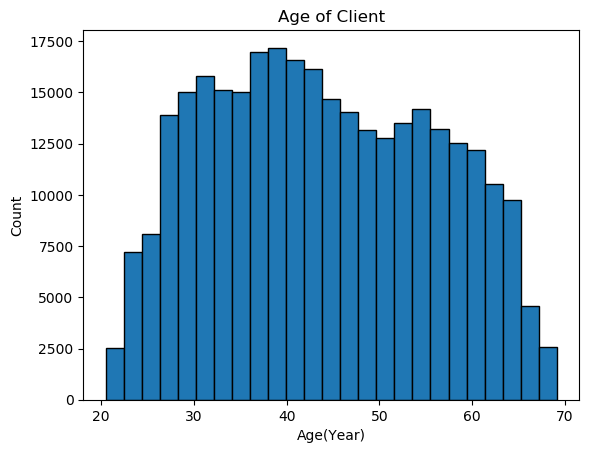

<Figure size 800x600 with 0 Axes>

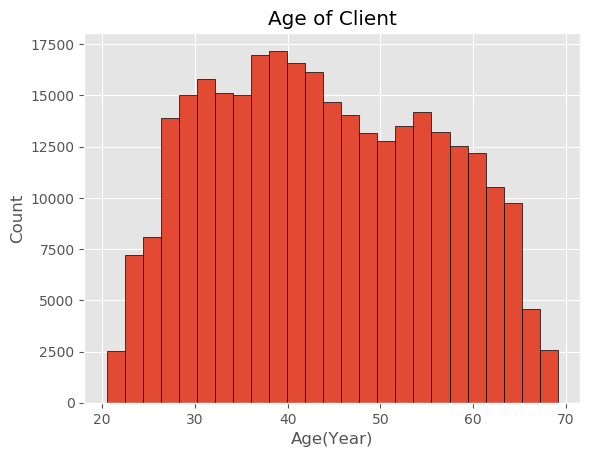

<Figure size 800x600 with 0 Axes>

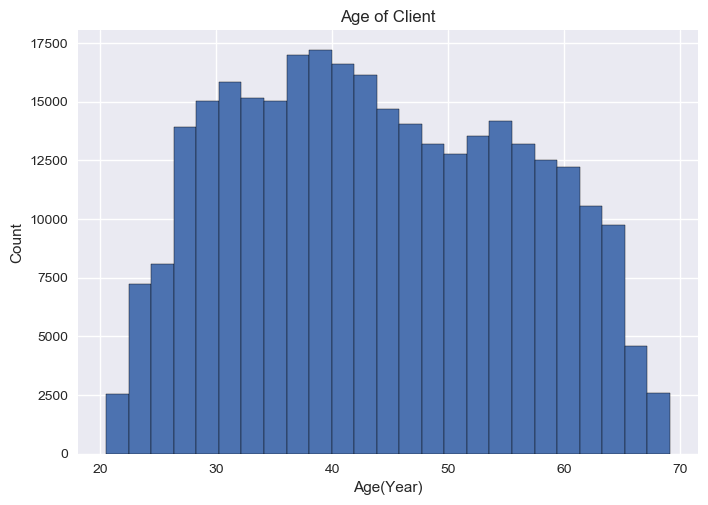

<Figure size 800x600 with 0 Axes>

In [24]:
#原style
plt.style.use("default")

plt.hist(app_train["DAYS_BIRTH"]/365,edgecolor ='k',bins = 25)
plt.title("Age of Client");plt.xlabel("Age(Year)");plt.ylabel("Count");
plt.figure(figsize=(8,6))
plt.show()

#change style
plt.style.use("ggplot")

plt.hist(app_train["DAYS_BIRTH"]/365,edgecolor ='k',bins = 25)
plt.title("Age of Client");plt.xlabel("Age(Year)");plt.ylabel("Count");
plt.figure(figsize=(8,6))
plt.show()

#change style again
plt.style.use("seaborn") 

plt.hist(app_train["DAYS_BIRTH"]/365,edgecolor ='k',bins = 25)
plt.title("Age of Client");plt.xlabel("Age(Year)");plt.ylabel("Count");
plt.figure(figsize=(8,6))
plt.show()

KDE Plot 練習

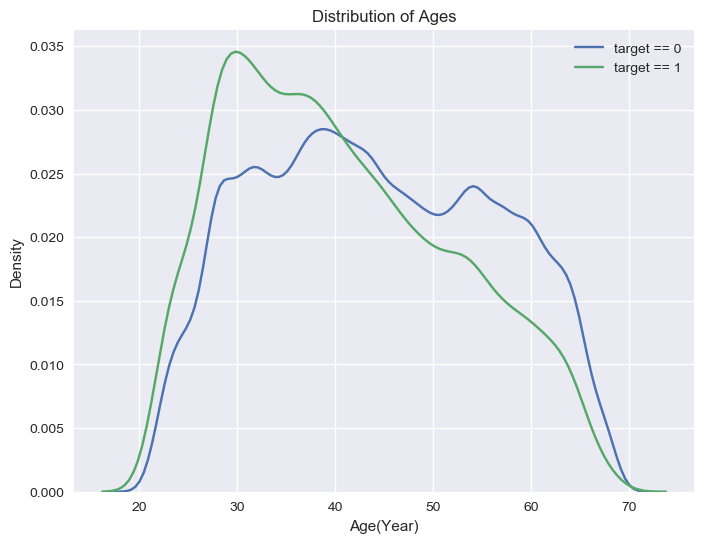

In [25]:
plt.figure(figsize=(8,6))

sns.kdeplot(app_train.loc[app_train["TARGET"]==0,"DAYS_BIRTH"]/365,label = "target == 0")
sns.kdeplot(app_train.loc[app_train["TARGET"]==1,"DAYS_BIRTH"]/365,label = "target == 1")

plt.title('Distribution of Ages');plt.xlabel("Age(Year)");plt.ylabel("Density");

plt.show()

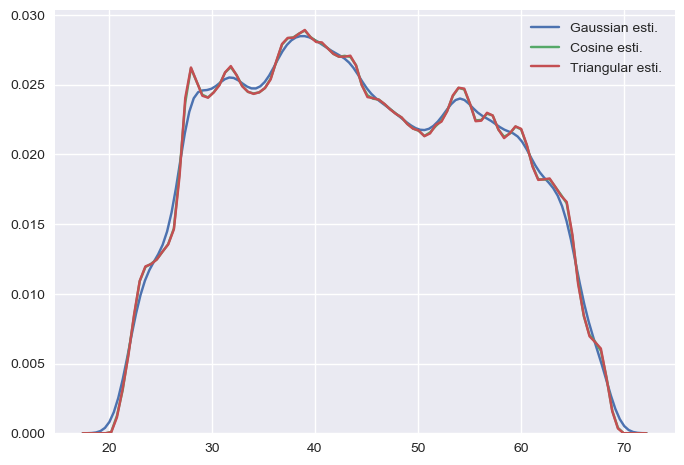

In [26]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

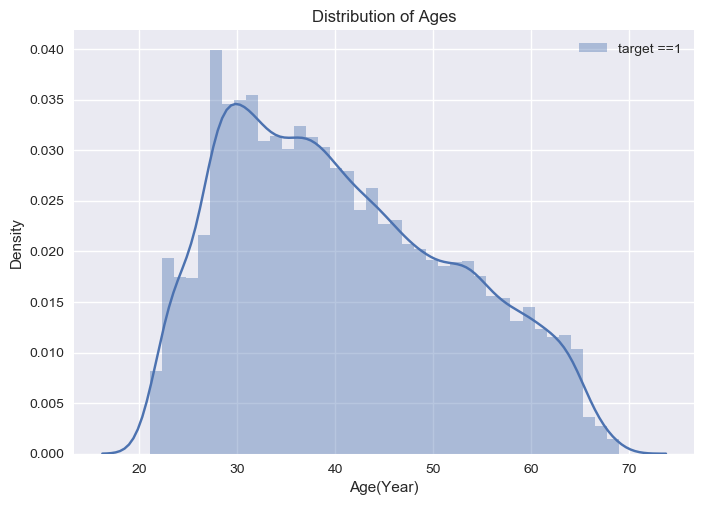

In [27]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train["TARGET"]==1,"DAYS_BIRTH"]/365,label ="target ==1")
plt.legend()
plt.title('Distribution of Ages');plt.xlabel("Age(Year)");plt.ylabel("Density");
plt.show()

# 作業

In [37]:
age_data = app_train[["TARGET","DAYS_BIRTH"]]
age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"]/365
bin_cut = [i for i in range(20,75,5)]
age_data["AGE_BINNED"] = pd.cut(age_data["YEARS_BIRTH"],bins = bin_cut)
print(age_data["AGE_BINNED"].value_counts())
age_data.head()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: AGE_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,AGE_BINNED
0,1,9461,25.920548,"(25, 30]"
1,0,16765,45.931507,"(45, 50]"
2,0,19046,52.180822,"(50, 55]"
3,0,19005,52.068493,"(50, 55]"
4,0,19932,54.608219,"(50, 55]"


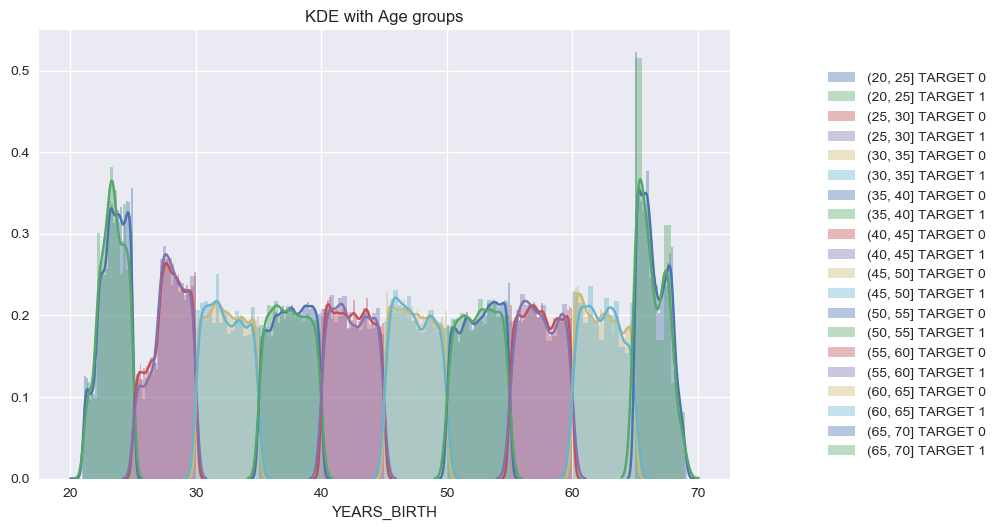

In [77]:
year_group_sorted = list(age_data['AGE_BINNED'].value_counts().sort_index().index)

fig = plt.figure(figsize=(10,6))

for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data["AGE_BINNED"]==year_group_sorted[i]) & \
                              (age_data["TARGET"]==0),"YEARS_BIRTH"],label = str(year_group_sorted[i])+' TARGET 0')
    sns.distplot(age_data.loc[(age_data['AGE_BINNED'] == year_group_sorted[i]) & \
                (age_data['TARGET'] == 1), 'YEARS_BIRTH'],label = str(year_group_sorted[i])+' TARGET 1')
plt.title('KDE with Age groups')
fig.legend(loc="center right")
plt.tight_layout(rect=[0,0,0.75,0.9])#避免兩個圖重疊，使用tight_layout分開
plt.show()

In [80]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('AGE_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
AGE_BINNED,,,
"(20, 25]",0.123036,8532.795625,23.377522
"(25, 30]",0.111436,10155.219250,27.822518
"(30, 35]",0.102814,11854.848377,32.479037
"(35, 40]",0.089414,13707.908253,37.555913
"(40, 45]",0.078491,15497.661233,42.459346
"(45, 50]",0.074171,17323.900441,47.462741
"(50, 55]",0.066968,19196.494791,52.593136
"(55, 60]",0.055314,20984.262742,57.491131
"(60, 65]",0.052737,22780.547460,62.412459


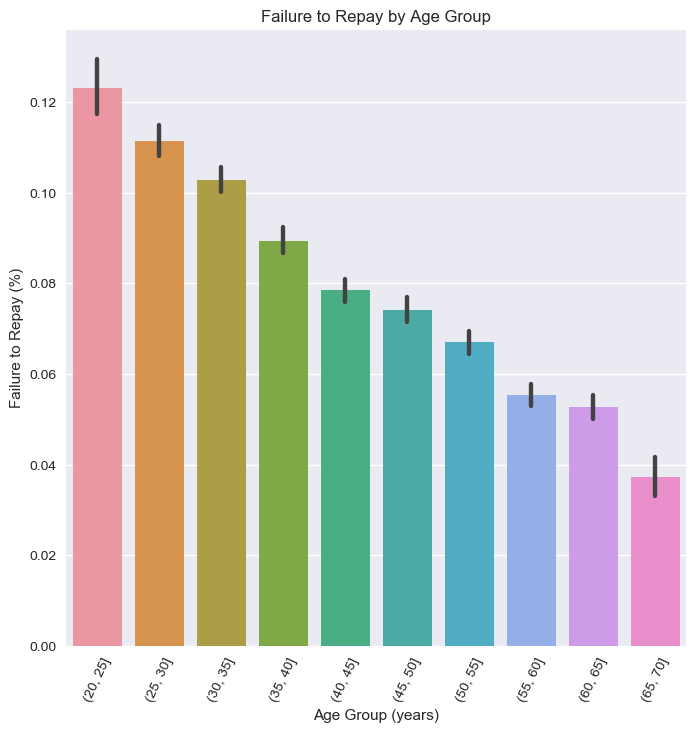

In [84]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_data['AGE_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 65);plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');